In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

x = np.linspace(0,1,200)

#set up a function of x 
y = x.copy() 
#^ note that we don't actually end up using y = x 
# anywhere, but it does set up the array
y[x < 0.1] = 0 #y = 0 for x < 0.1
y[x >= 0.1] = 0.5*(x[x >= 0.1]-0.1) #add a gradient of +0.5 if x >= 0.5
y[x >= 0.6] = 0.25-0.25/0.2*(x[x >= 0.6]-0.6) 
#^ gradient downwards from 0.6 to 0.8 (gradient 
#calculated so that line goes from 
#(0.6, 0.25) -> (0.8, 0), i.e. joins up with the other segments)
y[x > 0.8] = 0 #y = 0 for x > 0.8

Epoch 1/2000
7/7 [==============================] - 1s 4ms/step - loss: 0.0099
Epoch 2/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 3/2000
7/7 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 4/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 5/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 6/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 7/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 8/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 9/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 10/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 11/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 12/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 13/2000
7/7 [==============================

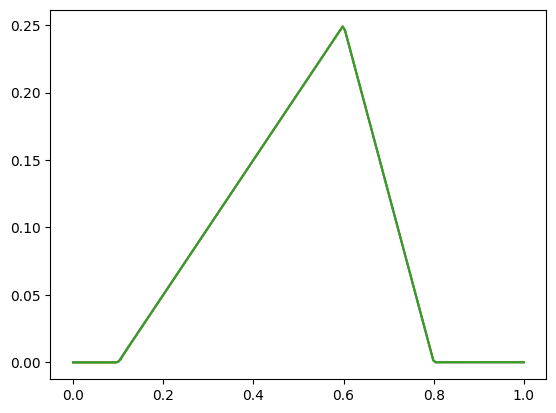

In [19]:
# plot the line
plt.plot(x,y)
# Now using Keras to fit the function

# set up a sequential neural network
model = Sequential()

# add a layer of 3 nodes of ReLUs (Rectified Linear Units) using a single parametric input
model.add(Dense(units=10, activation='relu', input_dim = 1))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
# add a linear node at the end to combine the nodes together
model.add(Dense(units=1, activation= 'linear'))

# compile the model, trying to minimise mean squared
# error and using the Adam algorithm to fit this:
model.compile(loss='mean_squared_error',optimizer='adam')

#fit the data provided previously, using 200 epochs and a batch size
model.fit(x,y,epochs=2000,batch_size=32)

# obtain a predicted set of values form teh fitted function
y_pred = model.predict(x)

#ploting the predicted data
plt.plot(x,y_pred)

#model.layers[0].set_weights([np.array([[0.5, -(-0.5-0.25/0.2), 0.25/0.2]],), np.array([-0.5*0.1, (-0.5-0.25/0.2)*0.6, -(0.25/0.2)*0.8],)]) 
#model.layers[1].set_weights([np.array([[1],[-1],[1]],), np.array([0],)])
y_manual = model.predict(x)

plt.plot(x,y_manual)

plt.show()